In [1]:
#importando librerias que se piensan utilizar
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
propiedades = pd.read_csv("propiedades_limpio.csv", decimal=".")

In [3]:
propiedades.head(3)

,place_with_parent_names,place_name,Tipo_propiedad,Ambientes,surface_total_in_m2,surface_covered_in_m2,Descripción,Título,currency,price_per_m2,...,id,pileta,amenities,cochera,pozo_en_descrip,pozo_en_title,a_estrenar,expensas,baulera,apto_credito
0,|Argentina|Capital Federal|Palermo|Palermo Soho|,Palermo Soho,apartment,1.0,50.0,30.0,Torre I Mondrian. 3 ambientes con terraza y d...,Vitraux Palermo,USD,3723.333333,...,13,1,1,0,1,1,0,1,0,0
1,|Argentina|Capital Federal|Palermo|Palermo Soho|,Palermo Soho,apartment,1.0,42.0,31.0,Torre II Dalí. Ambiente unico divisible.Vitrau...,Vitraux Palermo,USD,4770.967742,...,14,1,1,0,1,1,0,1,0,0
2,|Argentina|Capital Federal|Mataderos|,Mataderos,PH,4.0,140.0,98.0,Ventas Mataderos al frente Duplex 4 amb.- Plan...,VENTA-MATADEROS-DUPLEX 4 AMB.,USD,2438.775510,...,16,0,0,0,0,0,0,0,0,0


In [4]:
df_final2=propiedades[['currency','price_per_m2','surface_total_in_m2']]
aux=propiedades.iloc[0:,14:]
df_final3 =pd.concat([df_final2,aux], axis='columns')

In [5]:
 #Guardamos el final
#df_final3.to_dense().to_csv("propiedades_limpio2.csv", index = False, sep=',', encoding='utf-8')

In [6]:
df_final3.head()

,currency,price_per_m2,surface_total_in_m2,Barrio_agronomía,Barrio_almagro,Barrio_balvanera,Barrio_barracas,Barrio_barrio norte,Barrio_belgrano,Barrio_boca,...,id,pileta,amenities,cochera,pozo_en_descrip,pozo_en_title,a_estrenar,expensas,baulera,apto_credito
0,USD,3723.333333,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13,1,1,0,1,1,0,1,0,0
1,USD,4770.967742,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14,1,1,0,1,1,0,1,0,0
2,USD,2438.775510,140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16,0,0,0,0,0,0,0,0,0
3,USD,3645.833333,104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19,0,0,0,0,0,0,0,1,0
4,USD,3705.479452,118.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21,0,0,0,0,0,0,0,0,0


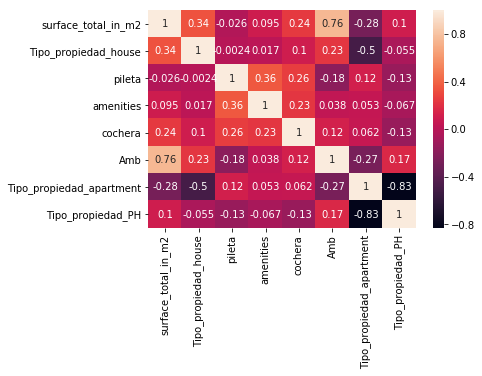

In [7]:
sns.heatmap(df_final3[['surface_total_in_m2','Tipo_propiedad_house', 'pileta', 'amenities', 'cochera', 'Amb','Tipo_propiedad_apartment','Tipo_propiedad_PH']].corr(), annot=True)
plt.show()

## Linear Regression

#### Probamos 3 modelos con distintas variables yendo de menos a mas

In [8]:
#DataFrame con distintos campos para probar

df_All = df_final3.drop(['currency','price_per_m2'], axis=1)

#Definimos las variables categoricas simples para probar un modelo
X = df_final3[['surface_total_in_m2', 'pileta', 'amenities','cochera']]
y = df_final3['price_per_m2']


In [9]:
#Cargamos el modelo
lm = linear_model.LinearRegression()

#### Primer modelo con solo 4 variables categoricas

In [10]:
#Hacemos el tran, testy split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

model_1 = lm.fit(X_train, y_train)




In [11]:
print('Score model_1 con test:', model_1.score(X_test, y_test))
print('Score model_1 con train:', model_1.score(X_train, y_train))

Score model_1 con test: 0.1972046239648647
Score model_1 con train: 0.16877149023227045


#### Segundo modelo con 8 Variables categoricas

In [12]:
# Entrenamos otro modelo con mas variables 

X_some = df_final3[['surface_total_in_m2', 'pileta', 'amenities','cochera','Amb','Tipo_propiedad_apartment','Tipo_propiedad_house','Tipo_propiedad_PH']]


X_some_train, X_some_test, y_some_train, y_some_test = train_test_split(X_some, y, test_size=0.35, random_state=10)

model_2 = lm.fit(X_some_train, y_some_train)



In [13]:
print('Score model_2 con test:', model_2.score(X_some_test, y_some_test))
print('Score model_2 con train:', model_2.score(X_some_train, y_some_train))

Score model_2 con test: 0.24324217105966628
Score model_2 con train: 0.20665269998060434


#### Tercer Modelo con todas las variables categoricas

In [14]:
# Entrenamos otro modelo con todas las variables

X_all = df_All

X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y, test_size=0.35, random_state=10)

model_3 = lm.fit(X_all_train, y_all_train)





In [15]:
print('Score model_3 con Test:', model_3.score(X_all_test, y_all_test))
print('Score model_3 con Train:', model_3.score(X_all_train, y_all_train))

Score model_3 con Test: 0.5103464401960419
Score model_3 con Train: 0.4895598780035393


#### Luego hicimos un cross validation general para saber con que tipos de Score nos estamos moviendo

In [16]:
# Cross Validation para liner regresion simple
from sklearn.model_selection import cross_val_score
for intercept in (True,False):
    lm = LinearRegression(fit_intercept=intercept)
    print(intercept, cross_val_score(lm,X_all_train,y_all_train, cv=20))


True [0.43183952 0.45706816 0.43711374 0.40436643 0.57172975 0.48600775
 0.50381164 0.44174718 0.48415035 0.41761179 0.50692135 0.50633572
 0.54601475 0.48408504 0.47254919 0.4851965  0.45328901 0.49753881
 0.53214414 0.43529837]
False [0.4318509  0.45612917 0.41850278 0.40051332 0.57218153 0.46992847
 0.50689377 0.44257181 0.48355056 0.41592504 0.5062226  0.50598222
 0.54771197 0.47781559 0.46413324 0.47341132 0.45507533 0.46815609
 0.52002165 0.43465366]


## Ridge and Lasso

#### Probamos Ridge and Lasso con todas las variables categoricas ya que en una regression simple fue donde obtuvimos el mejor score

In [ ]:
from sklearn import preprocessing

#Creo una variable con las columas que quiero escalar
lista_numericos = ['surface_total_in_m2', 'Amb']

#Instancio el metodo para escalar
scaler = StandardScaler()

#Asigno los valores normalizados  - Fiteo el modelo con los datos de training
X_all_train[lista_numericos] = scaler.fit_transform(X_all_train[lista_numericos] )
X_all_test[lista_numericos] = scaler.transform(X_all_test[lista_numericos] )



In [17]:
# Generamos un grid de $\alpha$ para probar e instanciamos un particionador del Training Set 
# en K partes para realizar la validación cruzada

al_ridge = np.linspace(0.001, 0.3, 300)
al_lasso = np.linspace(0.1, 0.5, 300)
kf = KFold(n_splits=5, shuffle=True, random_state=12)


In [18]:
# Instanciamos los modelos Ridge y Lasso

lm_ridge_cv= RidgeCV(alphas=al_ridge, cv=kf, normalize=True)
lm_lasso_cv = LassoCV(alphas=al_lasso, cv=kf, normalize=True)

In [19]:
# Entrenamos los modemos
lm_ridge_cv.fit(X_all_train, y_all_train)
lm_lasso_cv.fit(X_all_train, y_all_train)


LassoCV(alphas=array([0.1    , 0.10134, ..., 0.49866, 0.5    ]), copy_X=True,
    cv=KFold(n_splits=5, random_state=12, shuffle=True), eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=True, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [20]:
print('Alpha Ridge:',lm_ridge_cv.alpha_,'\n'
      'Alpha LASSO:',lm_lasso_cv.alpha_,'\n')

Alpha Ridge: 0.001 
Alpha LASSO: 0.1 



In [21]:
a = lm_ridge_cv.alpha_
ridge_final = Ridge(a)
ridge_final.fit(X_all_train, y_all_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [22]:
print("Score Train Ridge : %.4f\n" % lm_ridge_cv.score(X_all_test, y_all_test),
      "Score Train Lasso : %.4f\n" %  lm_lasso_cv.score(X_all_test, y_all_test),
     "Score Train Ridge Final : %.4f\n" %  ridge_final.score(X_all_test, y_all_test))

Score Train Ridge : 0.5105
 Score Train Lasso : 0.5089
 Score Train Ridge Final : 0.5103



## Prediccciones y eleccion de modelo

#### Dado que de los Ridge, Lasso y LM simple el mejor fue Ridge lm_ridge_cv

In [23]:
#Entrenamos el modelo elegido con todo el Data Set
lm_ridge_cv.fit(df_All, y)

RidgeCV(alphas=array([0.001, 0.002, ..., 0.299, 0.3  ]),
    cv=KFold(n_splits=5, random_state=12, shuffle=True),
    fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
    store_cv_values=False)

In [24]:
#Probamos el modelo entrenado con los valores de test, (deberia dar mejor score ya que usamos todos los datos para entrenar)
lm_ridge_cv.score(X_all_test, y_all_test)

0.5181160162044279

In [25]:
y_pred_tr_ridge = lm_ridge_cv.predict(df_All)

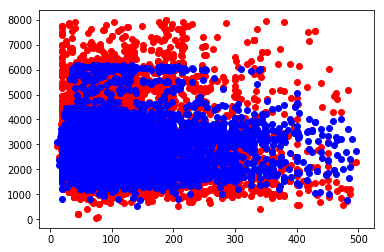

In [26]:
plt.scatter(df_All['surface_total_in_m2'], y,  color='red')
plt.scatter(df_All['surface_total_in_m2'], y_pred_tr_ridge, color='blue');

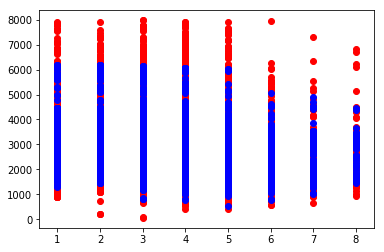

In [27]:
plt.scatter(df_All['Amb'], y,  color='red')
plt.scatter(df_All['Amb'], y_pred_tr_ridge, color='blue');

## Calculo de precio actual

In [28]:
df_final3['precio'] = (df_final3.surface_total_in_m2 * df_final3.price_per_m2).apply(pd.to_numeric)


In [29]:
df_result = df_final3[['surface_total_in_m2','price_per_m2','precio','id']].apply(pd.to_numeric)


In [30]:
#Elegimos el Portfolio
df_portfolio = df_result.sample(100)


In [31]:
df_pred = pd.DataFrame(y_pred_tr_ridge)

In [32]:
df_pred.columns = ['precio_m2_pred']

In [33]:
#Creamos el data frame con el precio calculado y el precio predecido
df_analisis = df_portfolio.join(df_pred)

In [34]:
df_analisis

,surface_total_in_m2,price_per_m2,precio,id,precio_m2_pred
2552,42.0,3880.000000,1.629600e+05,18898,3431.338964
9212,74.0,2297.297297,1.700000e+05,57062,2122.987784
1755,69.0,4909.090909,3.387273e+05,13336,3435.659542
5288,27.0,2777.777778,7.500000e+04,35266,2346.601245
6027,73.0,2307.692308,1.684615e+05,39434,2263.148763
7062,48.0,3222.222222,1.546667e+05,45378,2884.947026
9559,160.0,5312.500000,8.500000e+05,58839,3877.628774
10316,76.0,2333.333333,1.773333e+05,62137,2058.227254
267,119.0,2388.297872,2.842074e+05,4538,2214.853689
1826,69.0,2390.625000,1.649531e+05,13964,2309.143508


In [35]:
df_analisis['precio_pred'] = (df_analisis.surface_total_in_m2 * df_analisis.precio_m2_pred).apply(pd.to_numeric)

In [36]:
df_analisis['valuation'] = np.where(df_analisis['precio']>=df_analisis['precio_pred'], 'Sobrevaluada', 'Subvaluada')

In [37]:
df_analisis.head(10)

,surface_total_in_m2,price_per_m2,precio,id,precio_m2_pred,precio_pred,valuation
2552,42.0,3880.000000,162960.000000,18898,3431.338964,144116.236475,Sobrevaluada
9212,74.0,2297.297297,170000.000000,57062,2122.987784,157101.095998,Sobrevaluada
1755,69.0,4909.090909,338727.272727,13336,3435.659542,237060.508401,Sobrevaluada
5288,27.0,2777.777778,75000.000000,35266,2346.601245,63358.233619,Sobrevaluada
6027,73.0,2307.692308,168461.538462,39434,2263.148763,165209.859725,Sobrevaluada
7062,48.0,3222.222222,154666.666667,45378,2884.947026,138477.457267,Sobrevaluada
9559,160.0,5312.500000,850000.000000,58839,3877.628774,620420.603900,Sobrevaluada
10316,76.0,2333.333333,177333.333333,62137,2058.227254,156425.271326,Sobrevaluada
267,119.0,2388.297872,284207.446809,4538,2214.853689,263567.588946,Sobrevaluada
1826,69.0,2390.625000,164953.125000,13964,2309.143508,159330.902063,Sobrevaluada


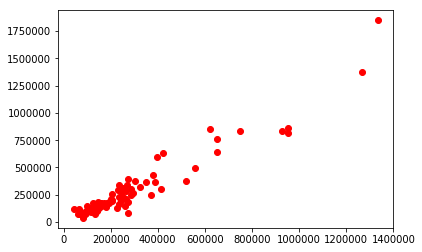

In [38]:
plt.scatter(df_analisis['precio_pred'], df_analisis['precio'],  color='red')

In [39]:
df_analisis['dif_precio'] = df_analisis['price_per_m2'] - df_analisis['precio_m2_pred']

In [40]:
df_analisis.head()

,surface_total_in_m2,price_per_m2,precio,id,precio_m2_pred,precio_pred,valuation,dif_precio
2552,42.0,3880.000000,162960.000000,18898,3431.338964,144116.236475,Sobrevaluada,448.661036
9212,74.0,2297.297297,170000.000000,57062,2122.987784,157101.095998,Sobrevaluada,174.309514
1755,69.0,4909.090909,338727.272727,13336,3435.659542,237060.508401,Sobrevaluada,1473.431367
5288,27.0,2777.777778,75000.000000,35266,2346.601245,63358.233619,Sobrevaluada,431.176533
6027,73.0,2307.692308,168461.538462,39434,2263.148763,165209.859725,Sobrevaluada,44.543544


In [41]:
#df_analisis(['precio_pred'], ascending=[True])
df_analisis.sort_values(('dif_precio'),ascending=True,inplace=True)


In [42]:
df_analisis.head(10)

,surface_total_in_m2,price_per_m2,precio,id,precio_m2_pred,precio_pred,valuation,dif_precio
6465,120.0,652.173913,78260.869565,41909,2277.180523,273261.662776,Subvaluada,-1625.006610
3859,30.0,1233.333333,37000.000000,26178,2759.592755,82787.782638,Subvaluada,-1526.259421
1346,49.0,1472.448980,72150.000000,10791,2761.855712,135330.929896,Subvaluada,-1289.406733
9091,70.0,2642.857143,185000.000000,56518,3917.577300,274230.410973,Subvaluada,-1274.720157
11981,133.0,2804.511278,373000.000000,117155,3923.329250,521802.790215,Subvaluada,-1118.817972
8711,43.0,2255.813953,97000.000000,54483,3286.371079,141313.956408,Subvaluada,-1030.557126
9134,110.0,1361.818182,149800.000000,56644,2382.144060,262035.846640,Subvaluada,-1020.325879
7219,38.0,2447.368421,93000.000000,46460,3413.640923,129718.355073,Subvaluada,-966.272502
6767,100.0,1300.000000,130000.000000,43772,2252.377480,225237.747976,Subvaluada,-952.377480
6218,134.0,2222.222222,297777.777778,40385,3080.008189,412721.097385,Subvaluada,-857.785967


In [45]:
# Las propiedades donde precio por m2 es menor al precio por m2 predicto son :(5)
#ID 
# 41909
# 26178
# 10791
# 56518
# 117155


cond_subvaluada1 = propiedades['id'] == 41909
cond_subvaluada2 = propiedades['id'] == 26178
cond_subvaluada3 = propiedades['id'] == 10791
cond_subvaluada4 = propiedades['id'] == 56518
cond_subvaluada5 = propiedades['id'] == 117155

In [44]:
print('--------------------------------------- Propiedad 1 ---------------------------------------')
print(propiedades.loc[cond_subvaluada1])
print('--------------------------------------- Propiedad 2 ---------------------------------------')
print(propiedades.loc[cond_subvaluada2])
print('--------------------------------------- Propiedad 3 ---------------------------------------')
print(propiedades.loc[cond_subvaluada3])
print('--------------------------------------- Propiedad 4 ---------------------------------------')
print(propiedades.loc[cond_subvaluada4])
print('--------------------------------------- Propiedad 5 ---------------------------------------')
print(propiedades.loc[cond_subvaluada5])


--------------------------------------- Propiedad 1 ---------------------------------------
                place_with_parent_names place_name Tipo_propiedad  Ambientes  \
3771  |Argentina|Capital Federal|Boedo|      Boedo      apartment        1.0   

      surface_total_in_m2  surface_covered_in_m2  \
3771                 30.0                   30.0   

                                            Descripción  \
3771  CTD830- UNICO DEPA PRECIO TOTAL U$S 35.080-DEP...   

                                           Título currency  price_per_m2  \
3771  CTD830- UNICO DEPA PRECIO TOTAL U$S 35.080-      USD   1173.333333   

          ...          id  pileta  amenities  cochera  pozo_en_descrip  \
3771      ...       25758       1          1        0                1   

      pozo_en_title  a_estrenar  expensas  baulera  apto_credito  
3771              1           0         0        0             0  

[1 rows x 88 columns]
--------------------------------------- Propiedad 2 ------------